In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


# import dataset

In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Dataset Overview

In [3]:
df = pd.DataFrame(data)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [5]:
 df.describe(include='object').T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


# Data Preprocessing

In [6]:
df = df.drop(['id'], axis=1)

In [7]:
df.duplicated().sum()

0

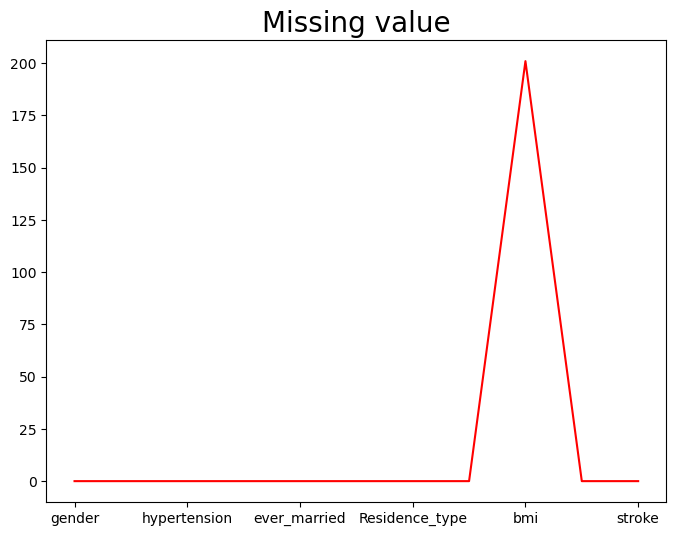

In [8]:
df_null = df.isnull().sum()
plt.figure (figsize= (8,6))
df_null.plot(color="red")
plt.title ("Missing value" , fontsize =20)
plt.xticks (fontsize=10)
plt.show()

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Categorical data 

In [12]:
def plot_categorical_data (column_name ,a,b,c):

    plt.figure (figsize= (10,8))
    plt.suptitle(column_name, fontsize=20) 
    plt.style.use('seaborn')
    plt.subplot(1,2,1)
    df[column_name].value_counts().plot(kind='bar',color=sns.color_palette(a))
    plt.subplot(1,2,2)
    df[column_name].value_counts().plot(kind='pie',autopct="%.2f%%", colors=[b, c])
    # draw circle
    centre_circle = plt.Circle((0, 0), 0.5, fc='white')
    fig = plt.gcf()
    # Adding Circle in Pie chart
    fig.gca().add_artist(centre_circle)
    
    plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14188\2679791602.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


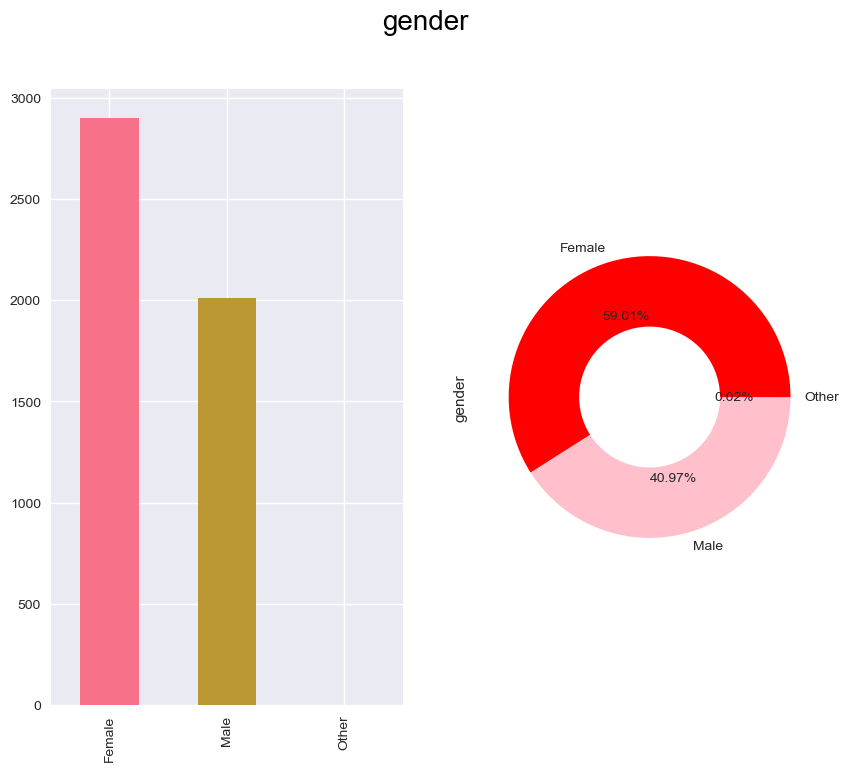

the unique value of Gender : 

['Male' 'Female' 'Other']

----------------------------------------
The number of each value of Gender : 

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64


In [13]:
plot_categorical_data ("gender","husl","red","pink")

print("the unique value of Gender : ")
print("")
print(df["gender"].unique())
print("")
print("-"*40)
print("The number of each value of Gender : ")
print("")
print(df["gender"].value_counts())

In [14]:
df.loc[df['gender'] == "Other"]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [15]:
df = df.drop(df[df['gender'] == 'Other'].index)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14188\2679791602.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


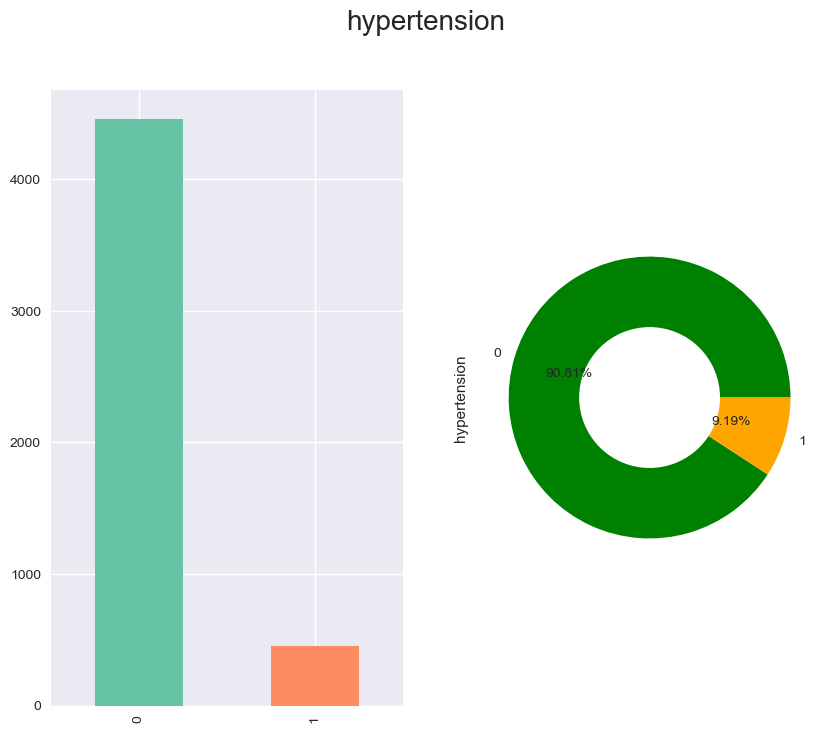

the unique value of Hypertension : 

[0 1]

----------------------------------------
The number of each value of Hypertension : 

0    4457
1     451
Name: hypertension, dtype: int64


In [16]:
plot_categorical_data ("hypertension","Set2","green","orange")

print("the unique value of Hypertension : ")
print("")
print(df["hypertension"].unique())
print("")
print("-"*40)
print("The number of each value of Hypertension : ")
print("")
print(df["hypertension"].value_counts())

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14188\2679791602.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


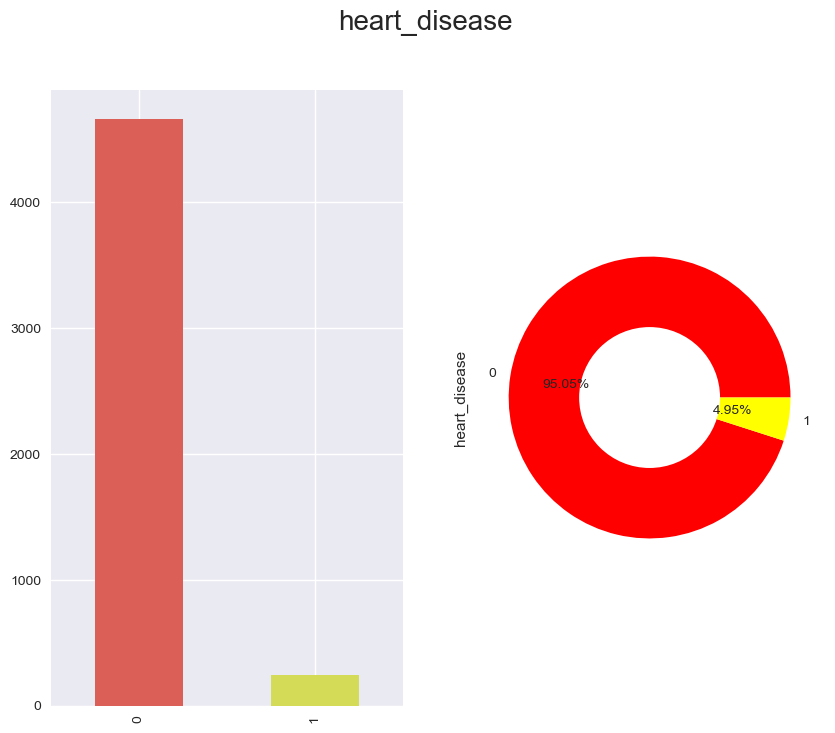

the unique value of Heart Disease : 

[1 0]

----------------------------------------
The number of each value of Heart Disease : 

0    4665
1     243
Name: heart_disease, dtype: int64


In [17]:
plot_categorical_data ("heart_disease","hls","red","yellow")

print("the unique value of Heart Disease : ")
print("")
print(df["heart_disease"].unique())
print("")
print("-"*40)
print("The number of each value of Heart Disease : ")
print("")
print(df["heart_disease"].value_counts())

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14188\2679791602.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


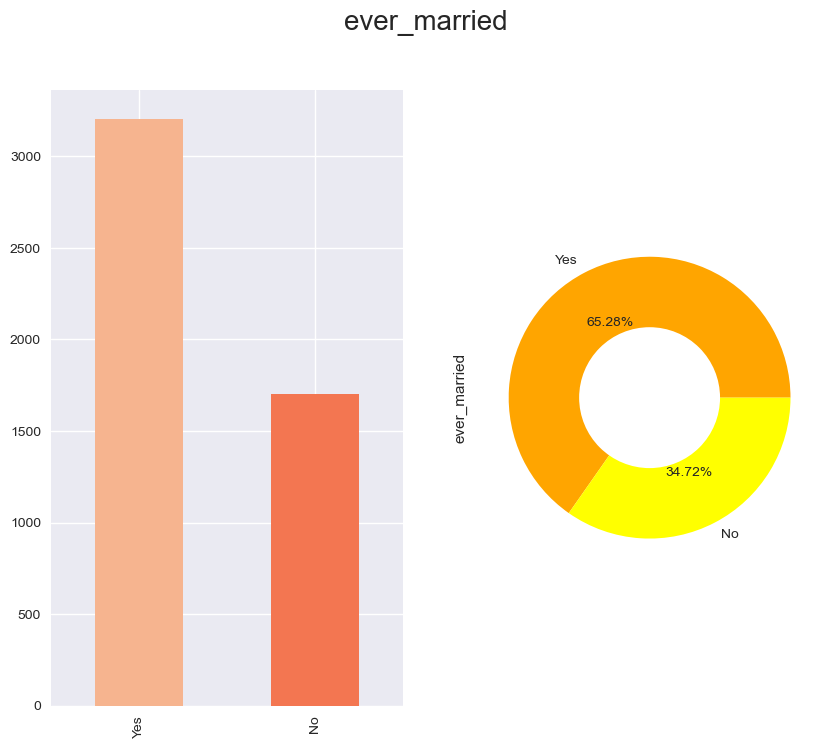

the unique value of Ever_Married : 

['Yes' 'No']

----------------------------------------
The number of each value of Ever_Married : 

Yes    3204
No     1704
Name: ever_married, dtype: int64


In [18]:
plot_categorical_data ("ever_married","rocket_r","orange","yellow")

print("the unique value of Ever_Married : ")
print("")
print(df["ever_married"].unique())
print("")
print("-"*40)
print("The number of each value of Ever_Married : ")
print("")
print(df["ever_married"].value_counts())


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14188\2679791602.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


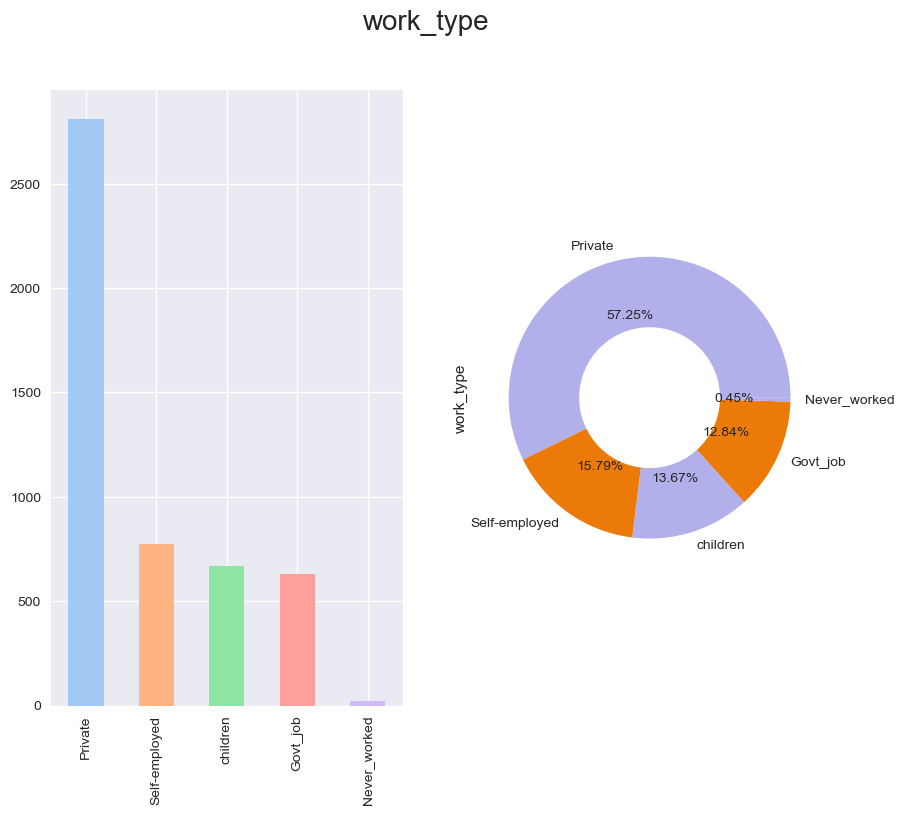

the unique value of Work_Type : 

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']

----------------------------------------
The number of each value of Work_Type : 

Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64


In [19]:
plot_categorical_data ("work_type","pastel","#B2B0EA","#EC7A08")

print("the unique value of Work_Type : ")
print("")
print(df["work_type"].unique())
print("")
print("-"*40)
print("The number of each value of Work_Type : ")
print("")
print(df["work_type"].value_counts())

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14188\2679791602.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


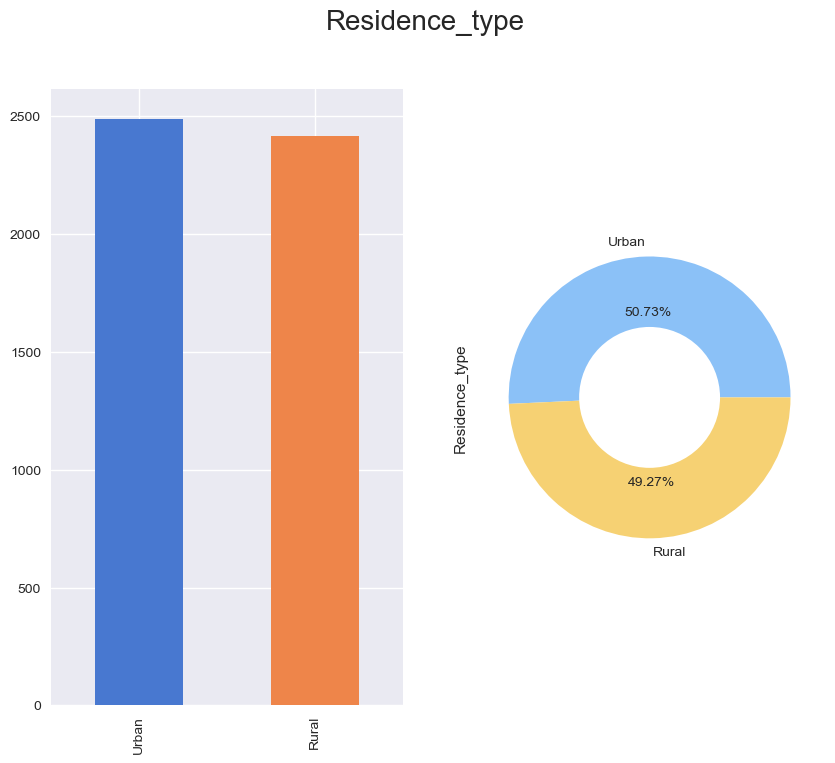

the unique value of Residence_type : 

['Urban' 'Rural']

----------------------------------------
The number of each value of Residence_type : 

Urban    2490
Rural    2418
Name: Residence_type, dtype: int64


In [20]:
plot_categorical_data ("Residence_type","muted","#8BC1F7","#F6D173")

print("the unique value of Residence_type : ")
print("")
print(df["Residence_type"].unique())
print("")
print("-"*40)
print("The number of each value of Residence_type : ")
print("")
print(df["Residence_type"].value_counts())


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14188\2679791602.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


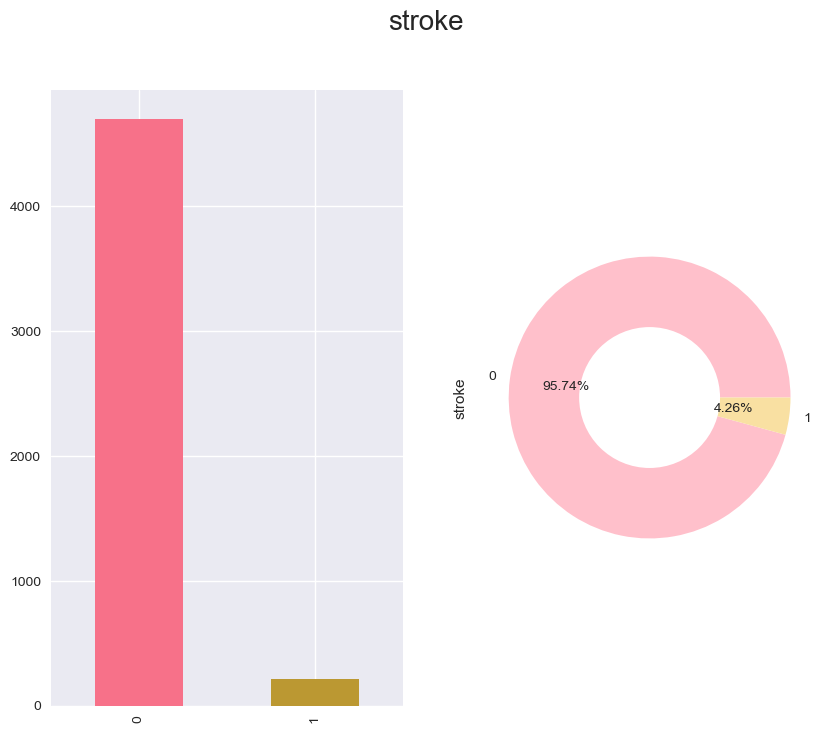

the unique value of Stroke : 

[1 0]

----------------------------------------
The number of each value of Stroke : 

0    4699
1     209
Name: stroke, dtype: int64


In [21]:
plot_categorical_data ("stroke","husl","pink","#F9E0A2")

print("the unique value of Stroke : ")
print("")
print(df["stroke"].unique())
print("")
print("-"*40)
print("The number of each value of Stroke : ")
print("")
print(df["stroke"].value_counts())

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14188\2679791602.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


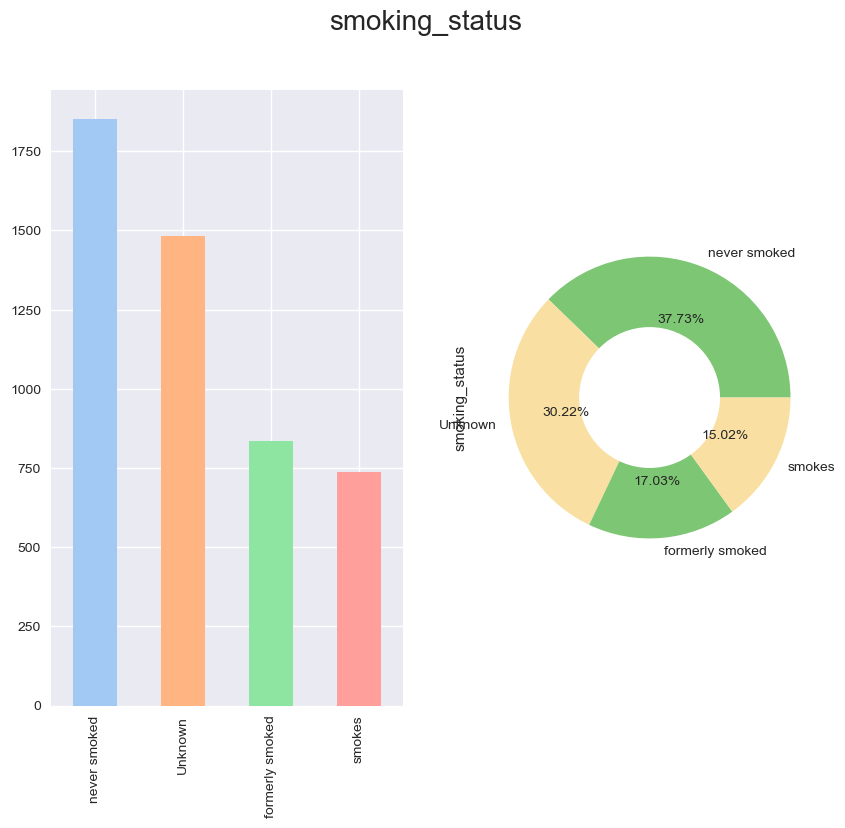

the unique value of Smoking Status : 

['formerly smoked' 'never smoked' 'smokes' 'Unknown']

----------------------------------------
The number of each value of Smoking Status : 

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64


In [22]:
plot_categorical_data ("smoking_status","pastel","#7CC674","#F9E0A2")

print("the unique value of Smoking Status : ")
print("")
print(df["smoking_status"].unique())
print("")
print("-"*40)
print("The number of each value of Smoking Status : ")
print("")
print(df["smoking_status"].value_counts())

In [23]:
df1 = df.loc[df['smoking_status'] != "Unknown"]
df1.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [24]:
print("the shape of dataset without unknown data is : ", df1.shape)

the shape of dataset without unknown data is :  (3425, 11)


# BoxPlot Numeric Data

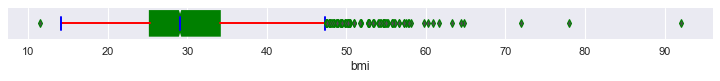

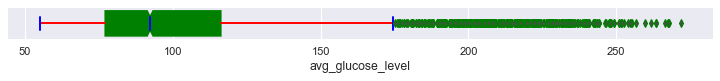

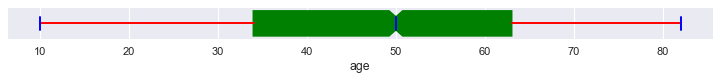

In [25]:
Numerical = ['bmi', 'avg_glucose_level', 'age']

c1 = "blue"
c2=  "red"
c3 = "green"
i = 0
while i<3:
    fig = plt.figure(figsize=(25,0.5), dpi=80)
    plt.subplot(1,2,1)
    sns.boxplot(x=Numerical[i], data=df1,
               notch=True,boxprops=dict(facecolor=c2, color=c3),
            capprops=dict(color=c1),
            whiskerprops=dict(color=c2),
            flierprops=dict(color=c1, markeredgecolor=c3),
            medianprops=dict(color=c1))
    i += 1
    plt.show()

# Distribution of numeric data

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14188\3197372445.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


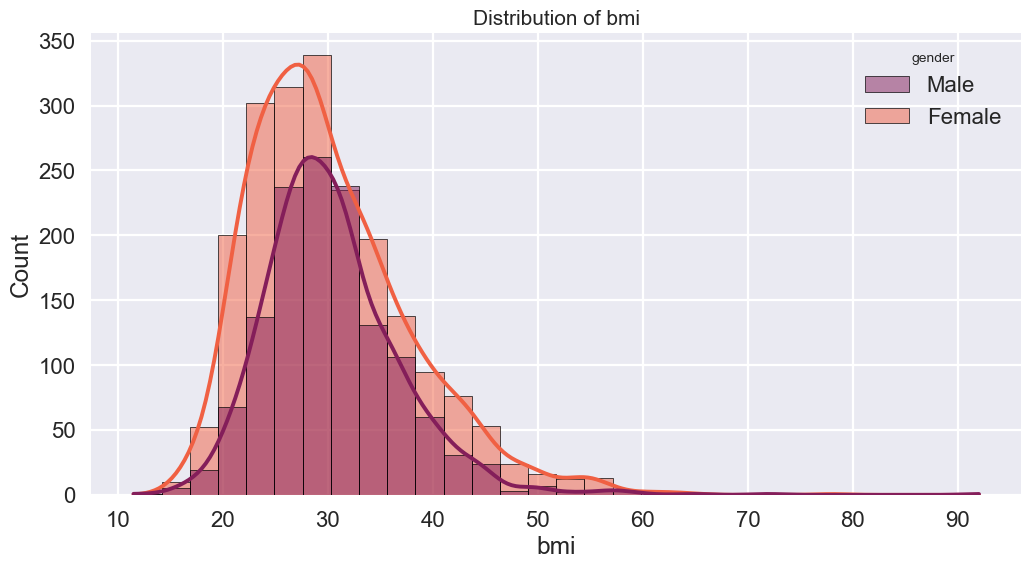

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14188\3197372445.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


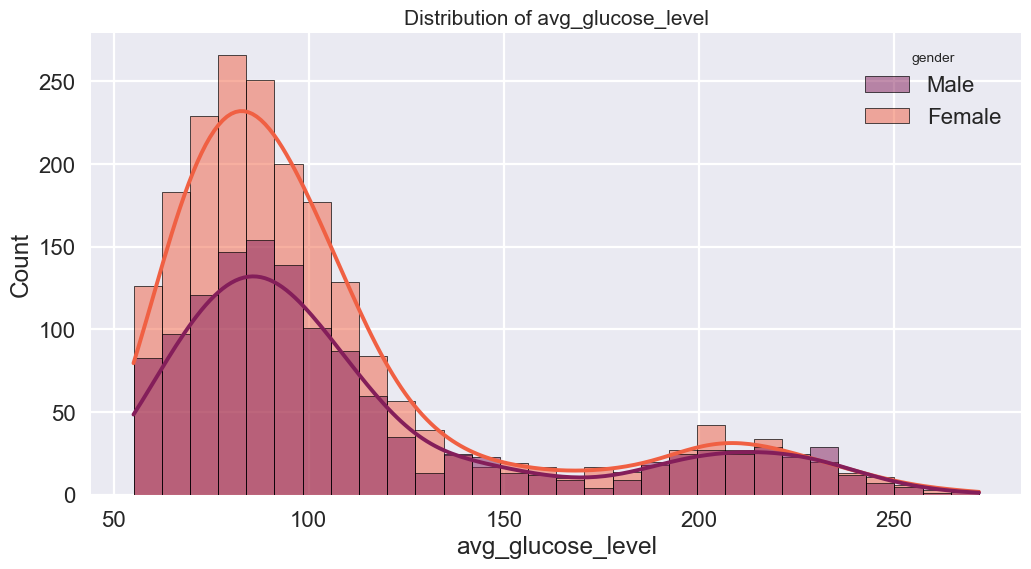

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14188\3197372445.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


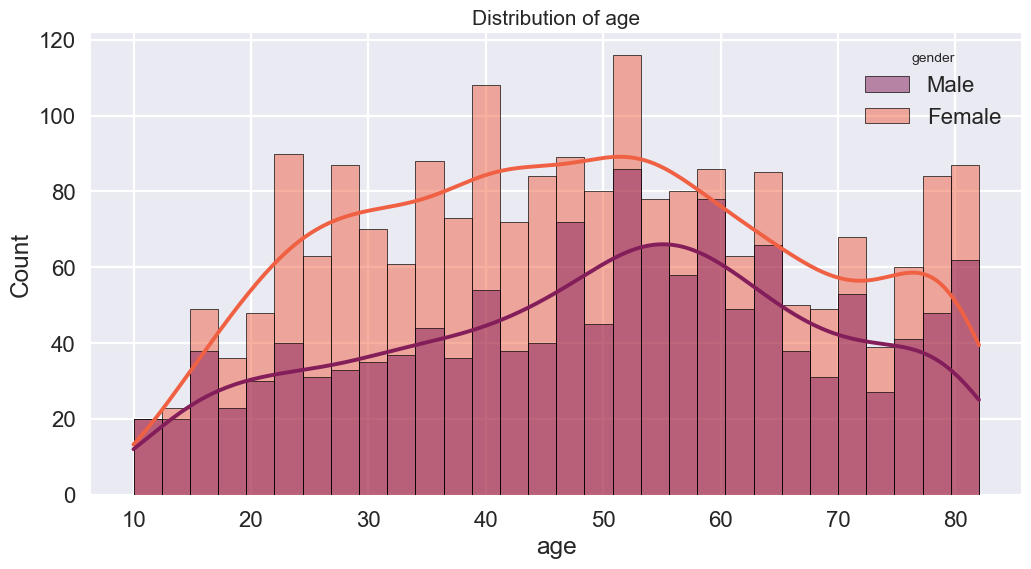

In [26]:
for col in Numerical:
    plt.figure(figsize=(12, 6))
    plt.style.use('seaborn-poster')
    colors_gender = sns.color_palette("rocket", n_colors=len(df1['gender'].unique()))
    sns.histplot(data=df1, x=col, kde=True, bins=30,hue="gender",palette=colors_gender)
    plt.title(f'Distribution of {col}', fontsize =15)
    plt.show()

Text(100, 35, '90<x<140')

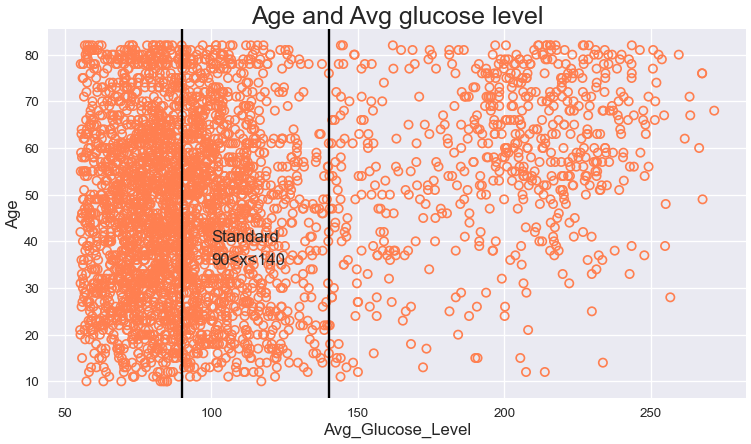

In [27]:
plt.figure(figsize = (15,8), dpi=60)
plt.scatter(df1["avg_glucose_level"], df1["age"], marker="o", s=100,facecolors='none', edgecolors='coral', lw=2)
plt.title("Age and Avg glucose level", fontsize=30 )
plt.xlabel("Avg_Glucose_Level", fontsize=20)
plt.ylabel("Age", fontsize=20)

plt.axvline(x = 90, color = 'black')
plt.axvline(x = 140, color = 'black')

plt.text(100, 40, 'Standard', fontsize=20)
plt.text(100, 35, '90<x<140', fontsize=20)

Text(35, 40, 'Excess fat : x>30')

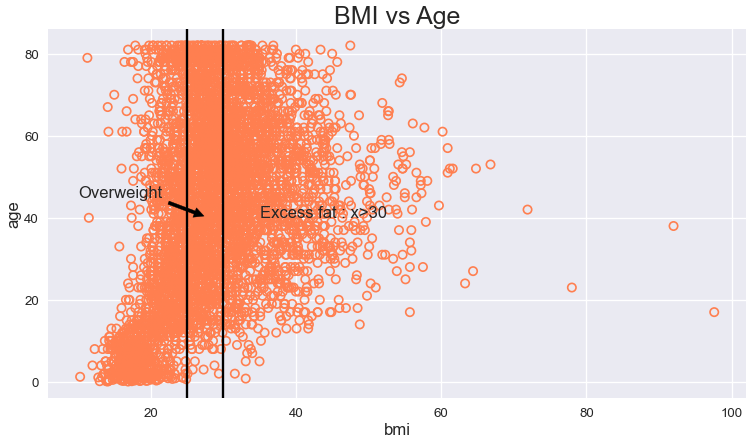

In [28]:
plt.figure(figsize = (15,8), dpi=60)
plt.scatter(df["bmi"], df["age"], marker="o", s=100,facecolors='none', edgecolors='coral', lw=2)
plt.title("BMI vs Age", fontsize=30 )
plt.xlabel("bmi", fontsize=20)
plt.ylabel("age", fontsize=20)

plt.axvline(x = 25, color = 'black')
plt.axvline(x = 30, color = 'black')
plt.annotate('Overweight', xy=(28,40),xytext=(10,45), arrowprops=dict(facecolor='black', shrink=0.1),fontsize=20)
plt.text(35, 40, 'Excess fat : x>30', fontsize=20)

Text(200, 60, 'Excess fat : y>30')

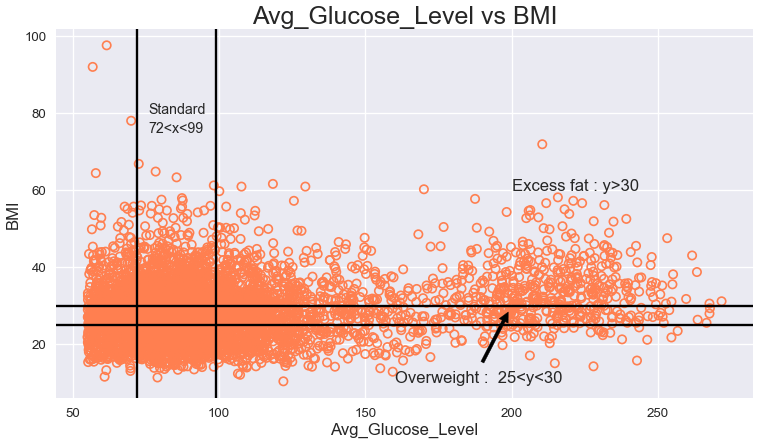

In [29]:
plt.figure(figsize = (15,8), dpi=60)
plt.scatter(df["avg_glucose_level"], df["bmi"], marker="o", s=100,facecolors='none', edgecolors='coral', lw=2)
plt.title("Avg_Glucose_Level vs BMI", fontsize=30)
plt.xlabel("Avg_Glucose_Level", fontsize=20)
plt.ylabel("BMI", fontsize=20)


plt.axvline(x = 72, color = 'black')
plt.axvline(x = 99, color = 'black')
plt.text(76, 80, 'Standard', fontsize=17)
plt.text(76, 75, '72<x<99', fontsize=17)

plt.axhline(y = 25, color = 'black')
plt.axhline(y = 30, color = 'black')
plt.annotate('Overweight :  25<y<30', xy=(200,30),xytext=(160,10), arrowprops=dict(facecolor='black', shrink=0.1),fontsize=20)
plt.text(200, 60, 'Excess fat : y>30', fontsize=20)

# Relationship between golocose/categorical data set

In [30]:
def feature_relationship (a,b,c):
    
    plt.figure(figsize = (15,10))
    plt.style.use('seaborn-poster')
    sns.displot(data=df1, x=a, hue=b, col=c, kind="kde")
    plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14188\2185858450.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


<Figure size 1500x1000 with 0 Axes>

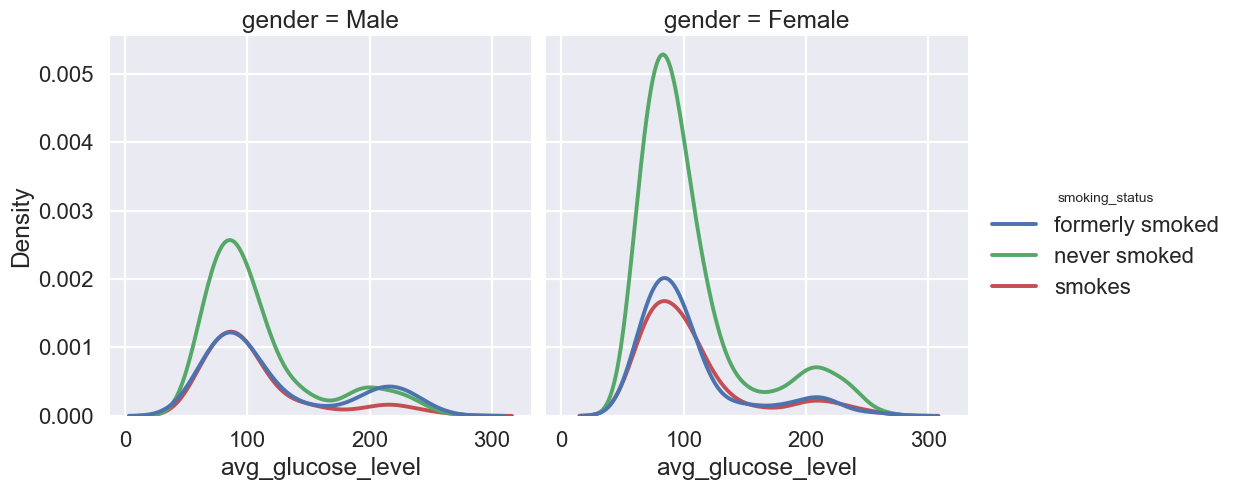

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14188\2185858450.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


<Figure size 1500x1000 with 0 Axes>

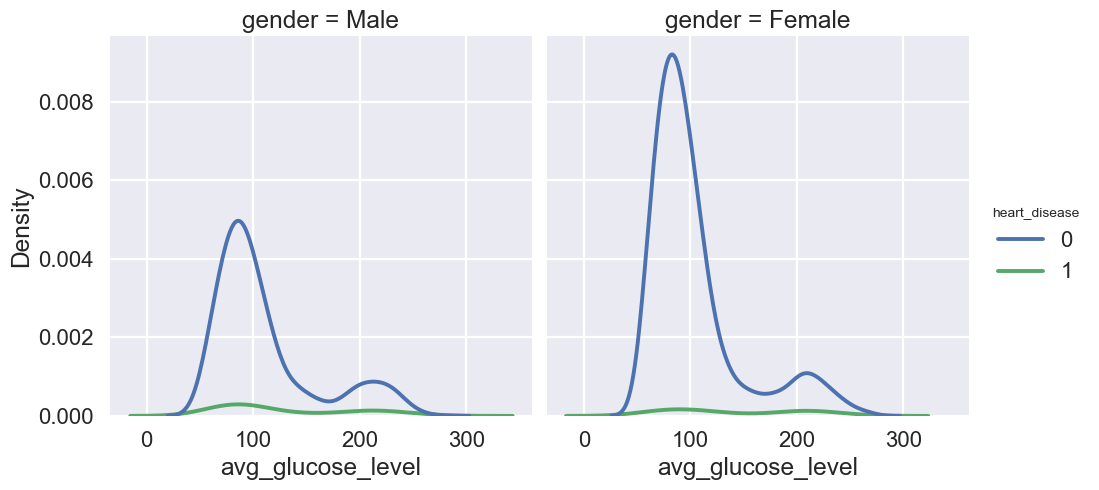

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14188\2185858450.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


<Figure size 1500x1000 with 0 Axes>

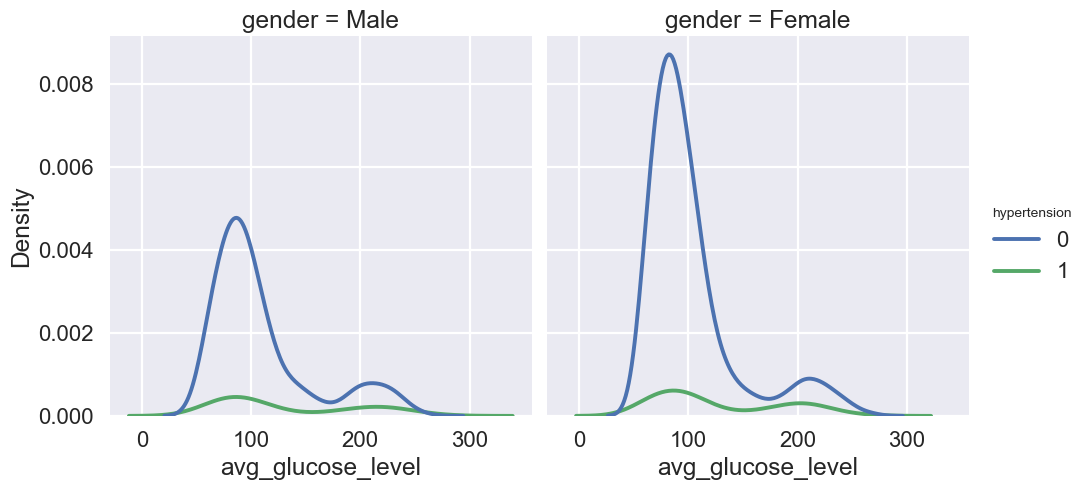

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14188\2185858450.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


<Figure size 1500x1000 with 0 Axes>

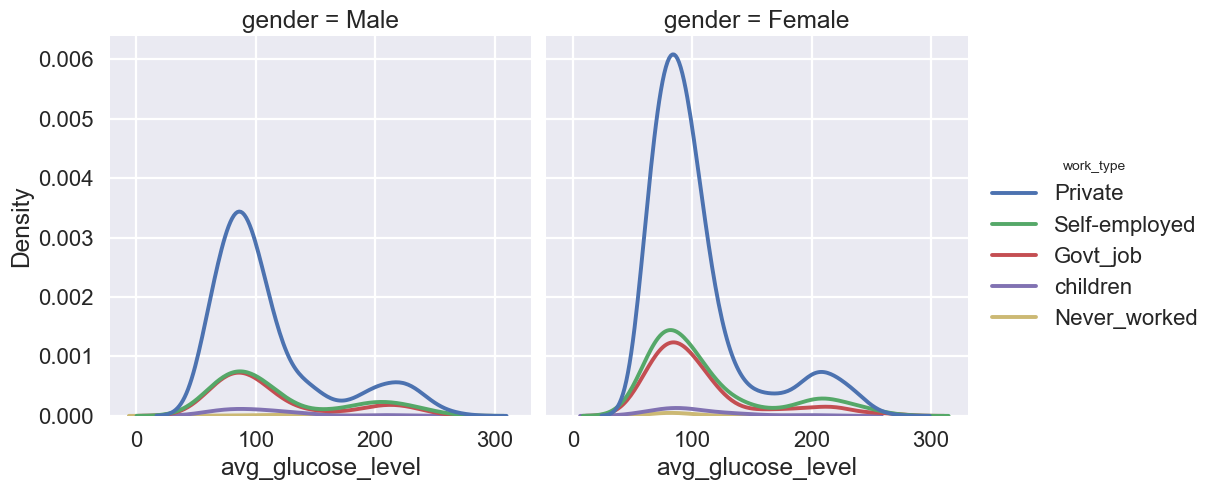

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14188\2185858450.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


<Figure size 1500x1000 with 0 Axes>

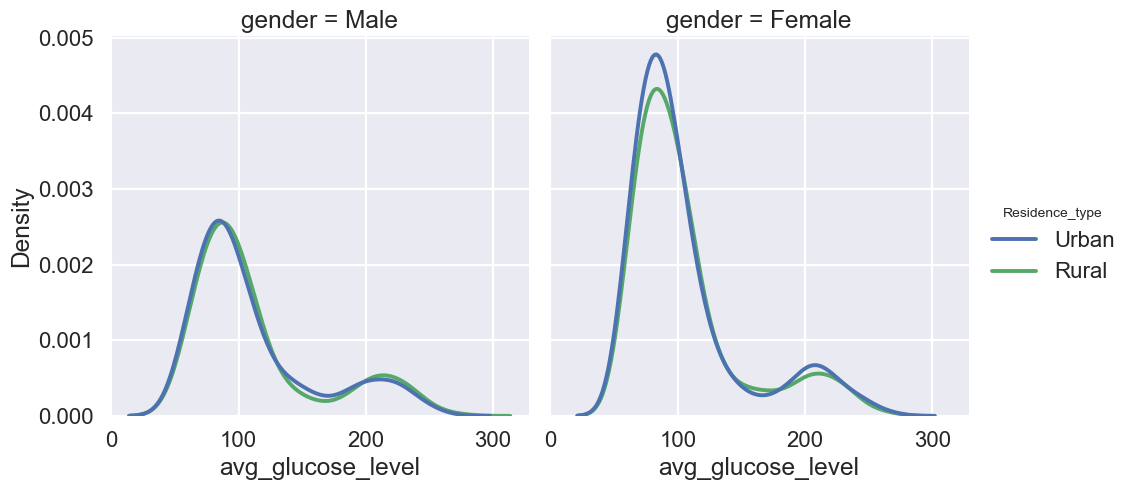

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14188\2185858450.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


<Figure size 1500x1000 with 0 Axes>

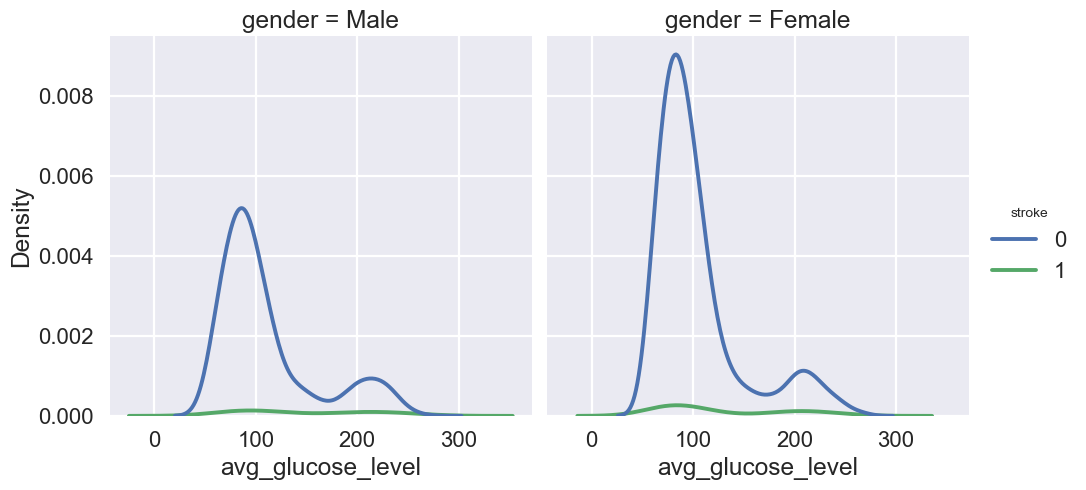

In [31]:
lst1 = ["smoking_status","heart_disease","hypertension","work_type","Residence_type","stroke"]
for i in range (len(lst1)):
    feature_relationship ("avg_glucose_level",lst1[i],"gender")

# Relation Between bmi/Categorical Data

In [36]:
def feature_relationship_bmi(a, b, c):
    
    colors_gender = sns.color_palette("rocket", n_colors=len(df1['gender'].unique()))
    plt.figure(figsize=(8,6))
    plt.style.use('seaborn-poster')
    sns.scatterplot(data=df1, x=a, y=b, hue=c ,palette=colors_gender)
    plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14188\273185006.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


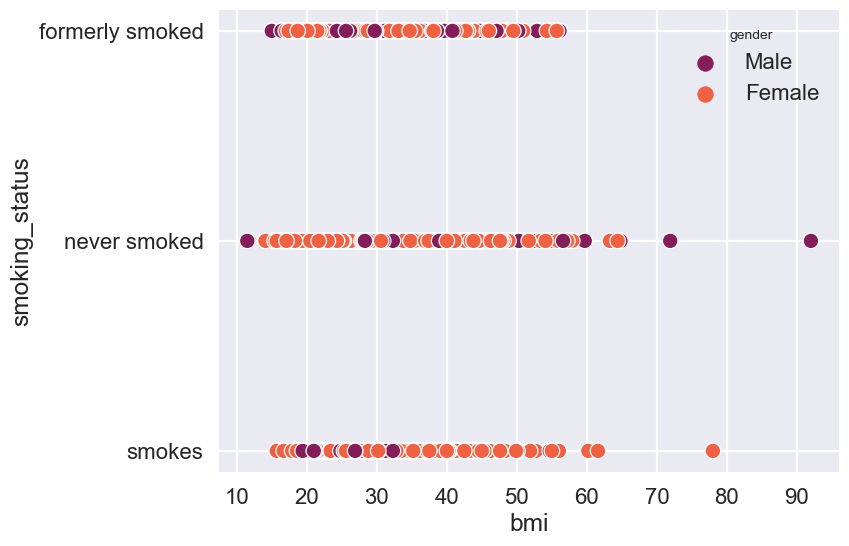

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14188\273185006.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


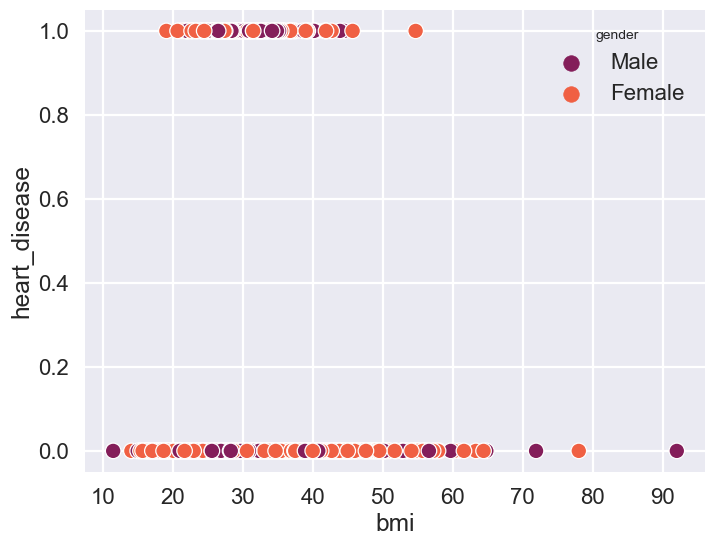

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14188\273185006.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


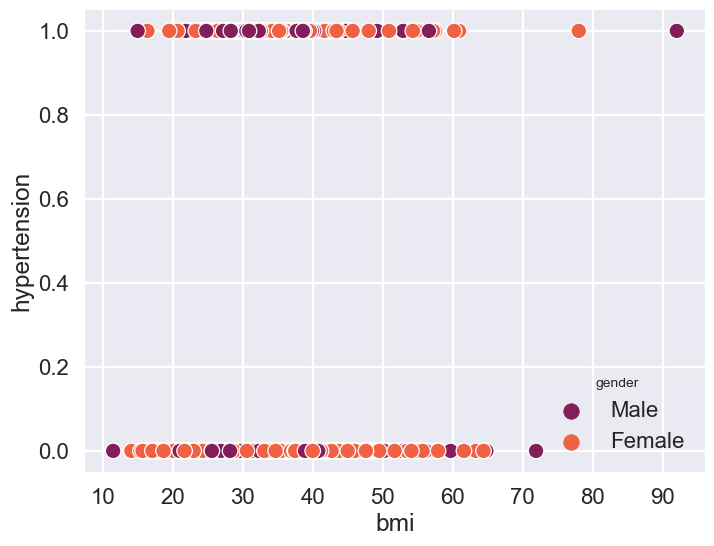

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14188\273185006.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


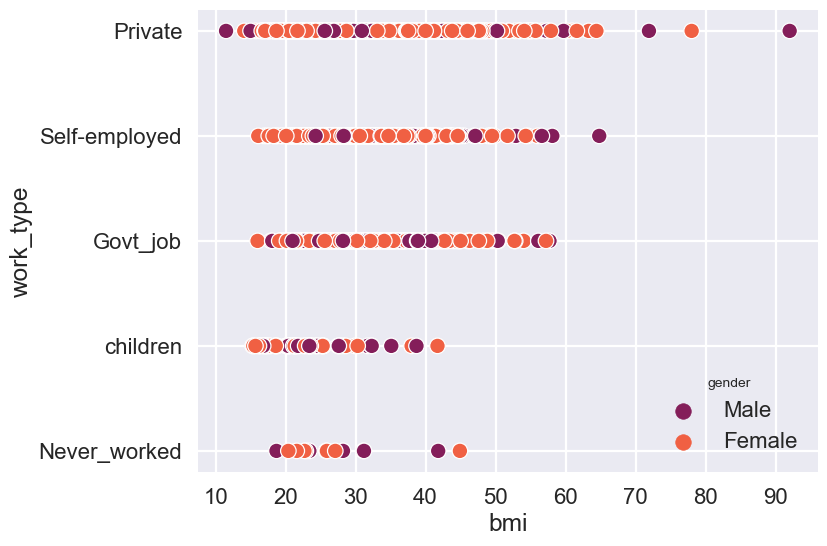

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14188\273185006.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


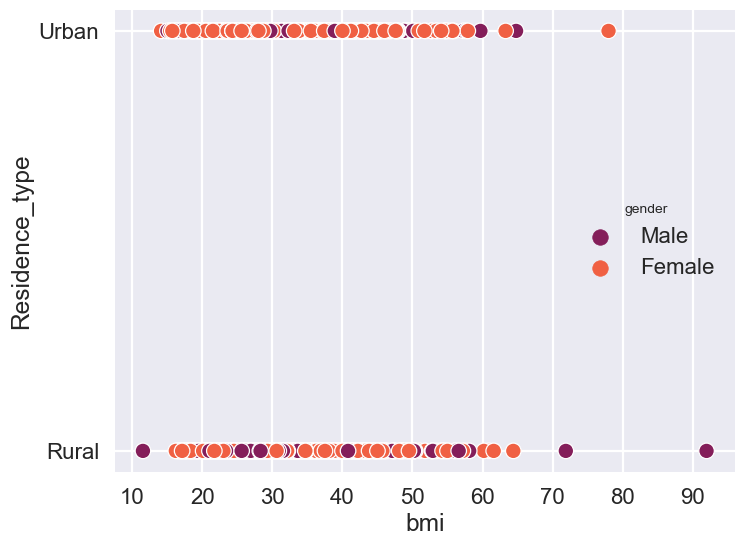

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14188\273185006.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


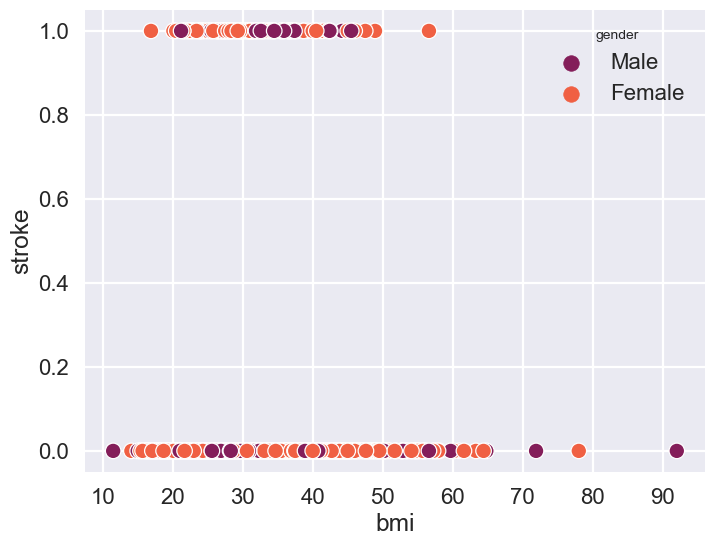

In [37]:
lst1 = ["smoking_status","heart_disease","hypertension","work_type","Residence_type","stroke"]
for i in range (len(lst1)):
    feature_relationship_bmi("bmi",lst1[i],"gender")

# Relation Between Stroke/Features

In [38]:
def target_features_relation (a,b):

    sns.catplot(
        data=df1, y=a, hue=b, kind="count",
        palette="husl", edgecolor=".6", height=4,
        aspect=2
    ).map(sns.histplot, binwidth=0.1)

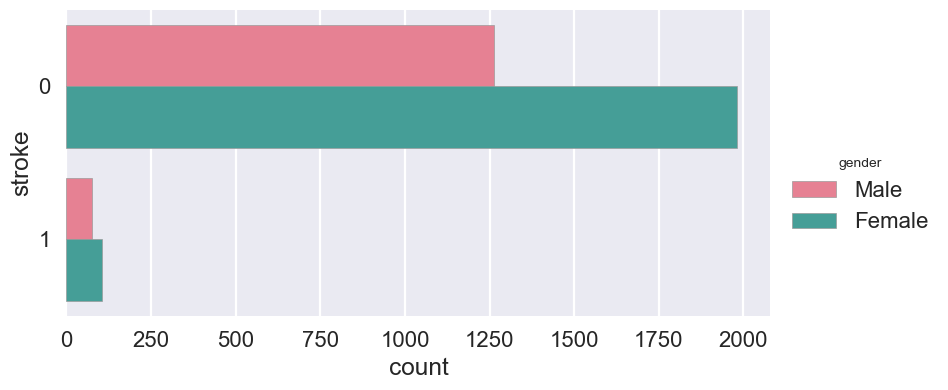

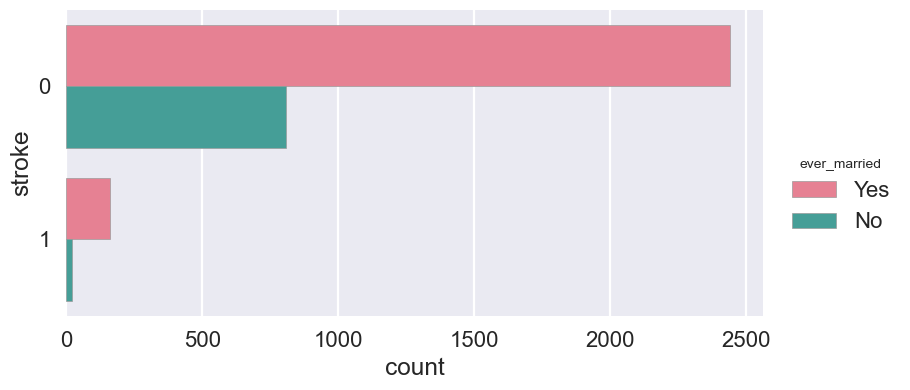

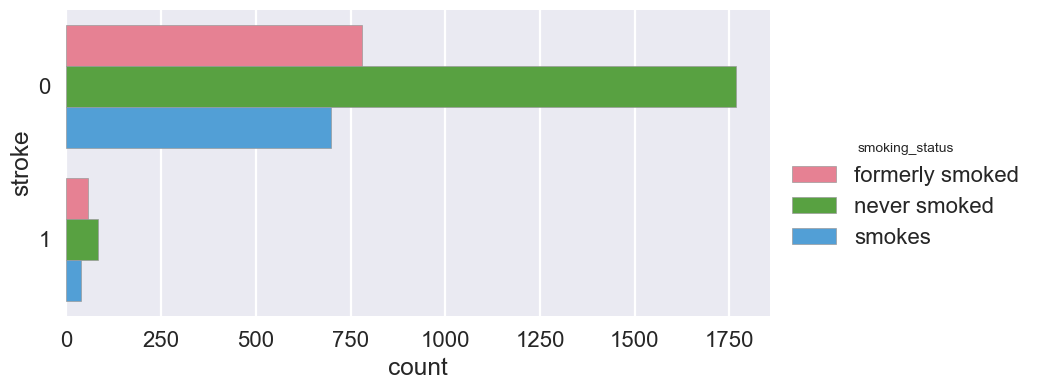

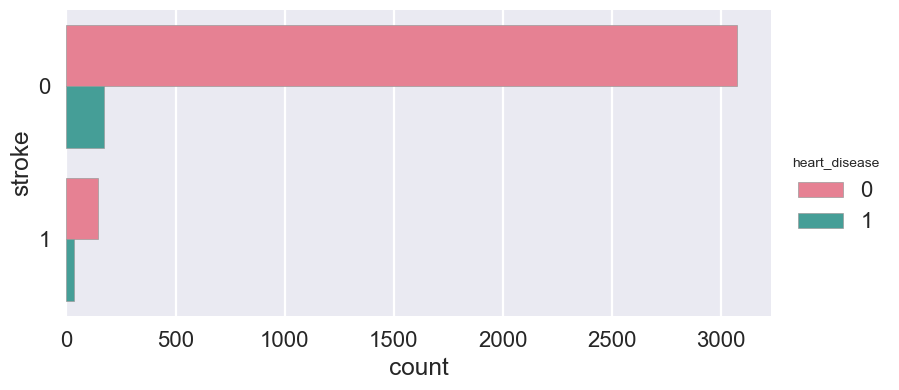

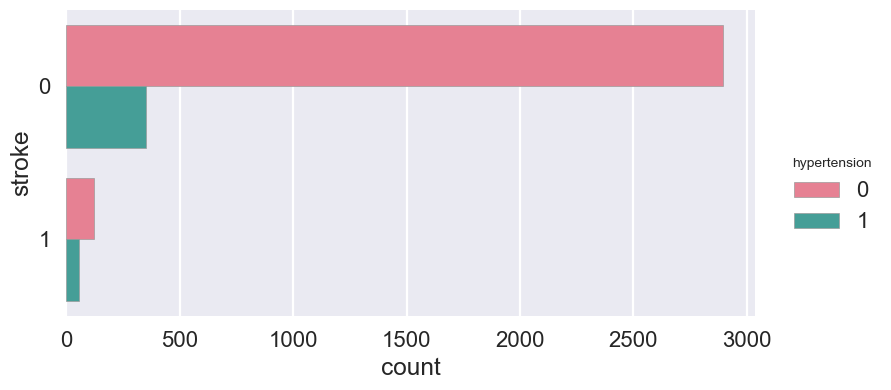

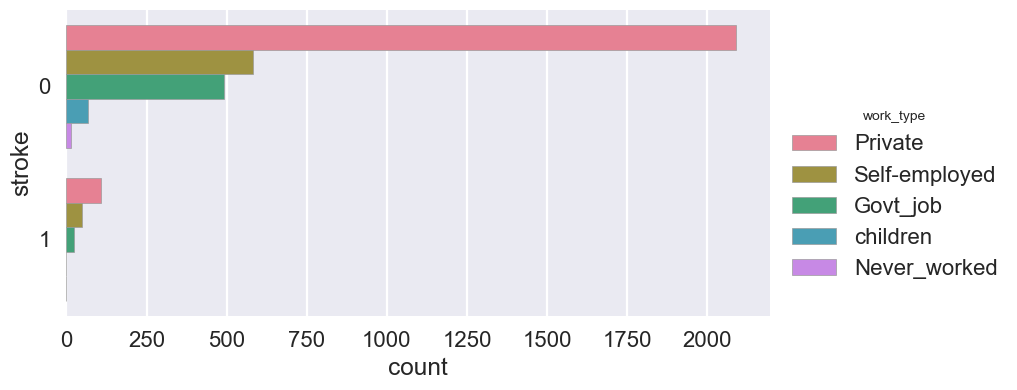

In [39]:
lst2 = ["gender","ever_married","smoking_status","heart_disease","hypertension","work_type","Residence_type"]
for i in range (len(lst1)):
    target_features_relation ("stroke",lst2[i])

# Removing Outlier Data

In [40]:
df2 = df1[df1["bmi"] < 70]

In [41]:
#converting categoprical data to numerical data
df2["gender"].replace({"Male":2 , "Female":3} , inplace= True)
df2["ever_married"].replace({"Yes":2 , "No":3} , inplace= True)
df2["work_type"].replace({"Never_worked":2 , "children":3, "Govt_job":4, "Self-employed":5 ,"Private":6} , inplace= True)
df2["Residence_type"].replace({"Urban":2 , "Rural":3} , inplace= True)
df2["smoking_status"].replace({"smokes":2 , "never smoked":3, "formerly smoked":4} , inplace= True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14188\3033280890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["gender"].replace({"Male":2 , "Female":3} , inplace= True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14188\3033280890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["ever_married"].replace({"Yes":2 , "No":3} , inplace= True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14188\3033280890.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

# Correlation

<Axes: >

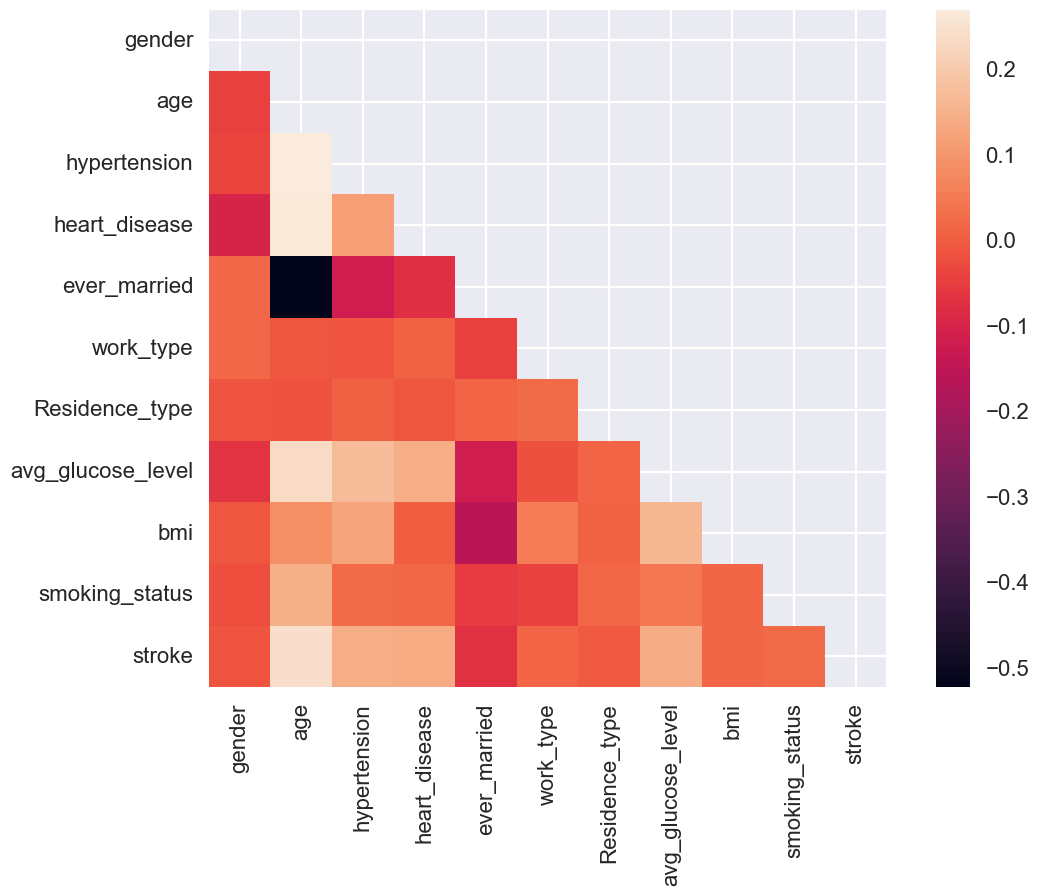

In [42]:
corr_matrix=df2.corr()

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix, mask=mask, square=True)

# Model Training

In [47]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report , confusion_matrix 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import ComplementNB

from warnings import simplefilter

simplefilter(action='ignore')

import warnings
warnings.filterwarnings('ignore')

In [48]:
#seperating target and features
x = pd.DataFrame (df2 , columns= ["gender","age","hypertension","heart_disease","ever_married","work_type","Residence_type","avg_glucose_level","bmi","smoking_status"])
y = df2.stroke.values.reshape (-1 , 1)

In [49]:
#normalize
scaler = preprocessing.MinMaxScaler (feature_range= (0,1))
norm1 = scaler.fit_transform(x)
x_norm= pd.DataFrame (norm1 , columns= ["gender","age","hypertension","heart_disease","ever_married","work_type","Residence_type","avg_glucose_level","bmi","smoking_status"])
x_norm

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.0,0.791667,0.0,1.0,0.0,1.00,0.0,0.801265,0.470919,1.0
1,0.0,0.972222,0.0,1.0,0.0,1.00,1.0,0.234512,0.393996,0.5
2,1.0,0.541667,0.0,0.0,0.0,1.00,0.0,0.536008,0.429644,0.0
3,1.0,0.958333,1.0,0.0,0.0,0.75,1.0,0.549349,0.234522,0.5
4,0.0,0.986111,0.0,0.0,0.0,1.00,0.0,0.605161,0.328330,1.0
...,...,...,...,...,...,...,...,...,...,...
3417,0.0,1.000000,1.0,0.0,0.0,0.75,1.0,0.077786,0.315197,0.5
3418,1.0,0.652778,0.0,0.0,0.0,1.00,1.0,0.105300,0.191370,0.5
3419,1.0,0.986111,0.0,0.0,0.0,0.75,0.0,0.323516,0.534709,0.5
3420,1.0,0.347222,0.0,0.0,0.0,0.75,1.0,0.128658,0.358349,0.5


Splitting training and testing data set

In [50]:
X_train, X_test, y_train, y_test = train_test_split (x_norm ,y, test_size =0.2 , random_state = 0)

In [51]:
logreg1 = LogisticRegression (solver= "saga" , C =20 ,class_weight="balanced",random_state=0)
logreg1.fit (X_train , y_train.ravel())
y_pred = logreg1.predict (X_test)
print("f1_score is :" ,  metrics.f1_score (y_test,y_pred))
print("acc :",metrics.accuracy_score(y_test,y_pred))

f1_score is : 0.2222222222222222
acc : 0.724087591240876


In [52]:
#improve the model

In [54]:
#CROSS VALIDATION

In [55]:
k_fold = KFold(10 ,shuffle=True , random_state=0)
print(cross_val_score(logreg1,x_norm,y,cv=k_fold,n_jobs=1))

[0.73469388 0.59766764 0.67251462 0.44736842 0.33918129 0.57894737
 0.60233918 0.53508772 0.64327485 0.68128655]


In [56]:
DF1 = df2 [(df2.index <1026)] 
DF2= df2[ (df2.index >1710)]
df3 = pd.concat([DF1, DF2])

In [57]:
x_cross = pd.DataFrame(df3, columns=["gender","age","hypertension","heart_disease","ever_married","work_type","Residence_type","avg_glucose_level","bmi","smoking_status"])
y_cross = df3["stroke"].values.reshape(-1,1)

In [58]:
#NORMALIZE
scaler = preprocessing.MinMaxScaler (feature_range= (0,1))
norm_cross = scaler.fit_transform(x_cross)
x_cross_norm= pd.DataFrame (norm_cross , columns= ["gender","age","hypertension","heart_disease","ever_married","work_type","Residence_type","avg_glucose_level","bmi","smoking_status"])

In [59]:
X_train, X_test, y_train, y_test = train_test_split (x_cross_norm ,y_cross, test_size =0.25 , random_state = 0)

In [60]:
lst_final =[]

logreg2 = LogisticRegression (solver= "sag" , C =20 ,random_state = 0)
logreg2.fit (X_train , y_train.ravel())
y_pred = logreg2.predict (X_test)
print("f1_score is :" ,  metrics.f1_score (y_test,y_pred))
eval =metrics.accuracy_score(y_test,y_pred)
lst_final.append (eval)
print("acc :",eval)

f1_score is : 0.0
acc : 0.9487870619946092


In [61]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       704
           1       0.00      0.00      0.00        38

    accuracy                           0.95       742
   macro avg       0.47      0.50      0.49       742
weighted avg       0.90      0.95      0.92       742



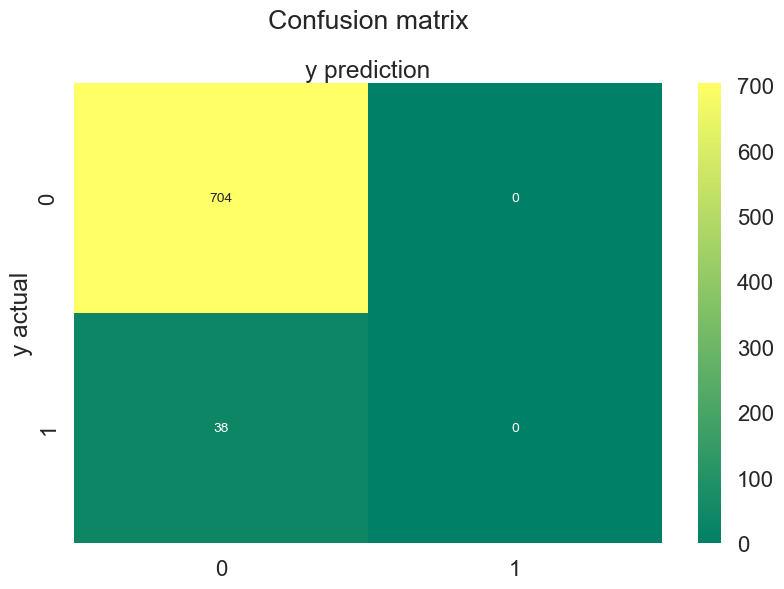


True Possitive    =  704
True Negative     =  0
False Possive     =  0
False Negative    =  38


In [62]:
fig, ax = plt.subplots(figsize=(8,6))
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, cmap="summer" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()
print('\nTrue Possitive    = ', cm[0][0])
print('True Negative     = ',   cm[1][1])
print('False Possive     = ',   cm[0][1])
print('False Negative    = ',   cm[1][0])

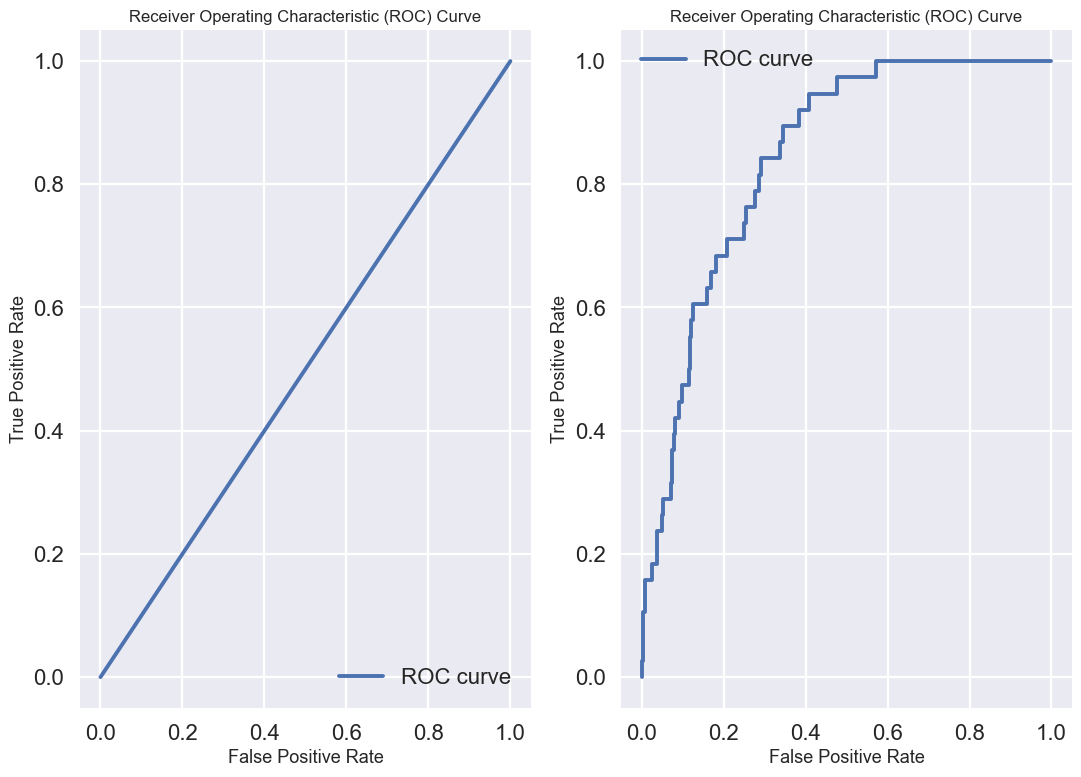

In [63]:
#plot 1:

fpr , tpr, _ = metrics.roc_curve (y_test, y_pred)
plt.subplot(1, 2, 1)
plt.plot (fpr , tpr, label = "ROC curve")
plt.legend(loc=4)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('Receiver Operating Characteristic (ROC) Curve' , fontsize=12)

#plot 2:

y_pred_proba = logreg2.predict_log_proba (X_test)[::,1]
fpr , tpr, _ = metrics.roc_curve (y_test, y_pred_proba)
plt.subplot(1, 2, 2)
plt.plot (fpr , tpr, label = "ROC curve")
plt.legend(loc="best")
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('Receiver Operating Characteristic (ROC) Curve',fontsize=12)

plt.show()

# training the data with different data types